In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

 DengAI.ipynb			     Iquitos.ipynb
'Dengue Data Visualizations.ipynb'  'San Juan.ipynb'
 dengue_features_test.csv	     submission1.csv
 dengue_features_train.csv	     submission_format.csv
 dengue_labels_train.csv	    'Train Data vs Test Data.ipynb'


In [3]:
train_data = pd.read_csv('dengue_features_train.csv')
test_data = pd.read_csv('dengue_features_test.csv')

In [4]:
train_data.shape, test_data.shape

((1456, 24), (416, 24))

In [5]:
train_data['type'] = 'train'
test_data['type'] = 'test'
test_and_train = pd.concat([train_data, test_data])
test_and_train.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...    \
0  0.177617                 12.42             297.572857  ...     
1  0.155486                 22.82             298.211429  ...     
2  0.170843                 34.54             298.781429  ...     
3  0.235886                 15.36             298.987143  ...     
4  0.247340                  7.52             299.518571  ...     

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm   type  
0                20.0               16.0  train  
1                22.2                8.6  train  
2                22.8               41.4  train  
3                23.3                4.0  train  
4                23.9                5.8  train  

[5 rows x 25 columns]

In [14]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(test_and_train.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(test_and_train.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(test_and_train.columns)))

numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names

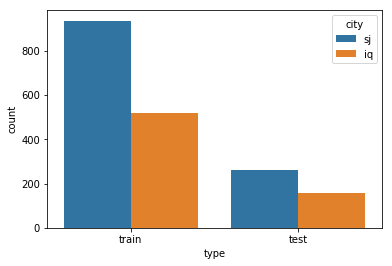

In [6]:
sns.countplot(data=test_and_train, x='type', hue='city')

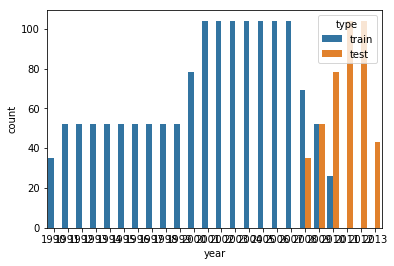

In [7]:
sns.countplot(test_and_train['year'], hue=test_and_train['type'])

In [8]:
test_data['city'].value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [9]:
test_data.describe()

year  weekofyear     ndvi_ne     ndvi_nw     ndvi_se  \
count   416.000000  416.000000  373.000000  405.000000  415.000000   
mean   2010.766827   26.439904    0.126050    0.126803    0.207702   
std       1.434835   14.978257    0.164353    0.141420    0.079102   
min    2008.000000    1.000000   -0.463400   -0.211800    0.006200   
25%    2010.000000   13.750000   -0.001500    0.015975    0.148670   
50%    2011.000000   26.000000    0.110100    0.088700    0.204171   
75%    2012.000000   39.000000    0.263329    0.242400    0.254871   
max    2013.000000   53.000000    0.500400    0.649000    0.453043   

          ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  415.000000            414.000000             414.000000   
mean     0.201721             38.354324             298.818295   
std      0.092028             35.171126               1.469501   
min     -0.014671              0.000000             294.554286   
25%      0.134079              8.175000             297.751429   
50%      0.186471             31.455000             298.547143   
75%      0.253243             57.772500             300.240357   
max      0.529043            169.340000             301.935714   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k        ...          \
count             414.000000                   414.000000        ...           
mean              299.353071                   295.419179        ...           
std                 1.306233                     1.523099        ...           
min               295.235714                   290.818571        ...           
25%               298.323214                   294.335714        ...           
50%               299.328571                   295.825000        ...           
75%               300.521429                   296.643571        ...           
max               303.328571                   297.794286        ...           

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                       414.000000                            414.000000   
mean                         42.171135                             82.499810   
std                          48.909514                              7.378243   
min                           0.000000                             64.920000   
25%                           9.430000                             77.397143   
50%                          25.850000                             80.330000   
75%                          56.475000                             88.328929   
max                         301.400000                             97.982857   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                    414.000000                             414.000000   
mean                      38.354324                              16.927088   
std                       35.171126                               1.557868   
min                        0.000000                              12.537143   
25%                        8.175000                              15.792857   
50%                       31.455000                              17.337143   
75%                       57.772500                              18.174643   
max                      169.340000                              19.598571   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count         414.000000          404.000000               404.000000   
mean            5.124569           27.369587                 7.810991   
std             3.542870            1.232608                 2.449718   
min             1.485714           24.157143                 4.042857   
25%             2.446429           26.514286                 5.928571   
50%             2.914286           27.483333                 6.642857   
75%             8.171429           28.319048                 9.812500   
max            14.485714           30.271429               

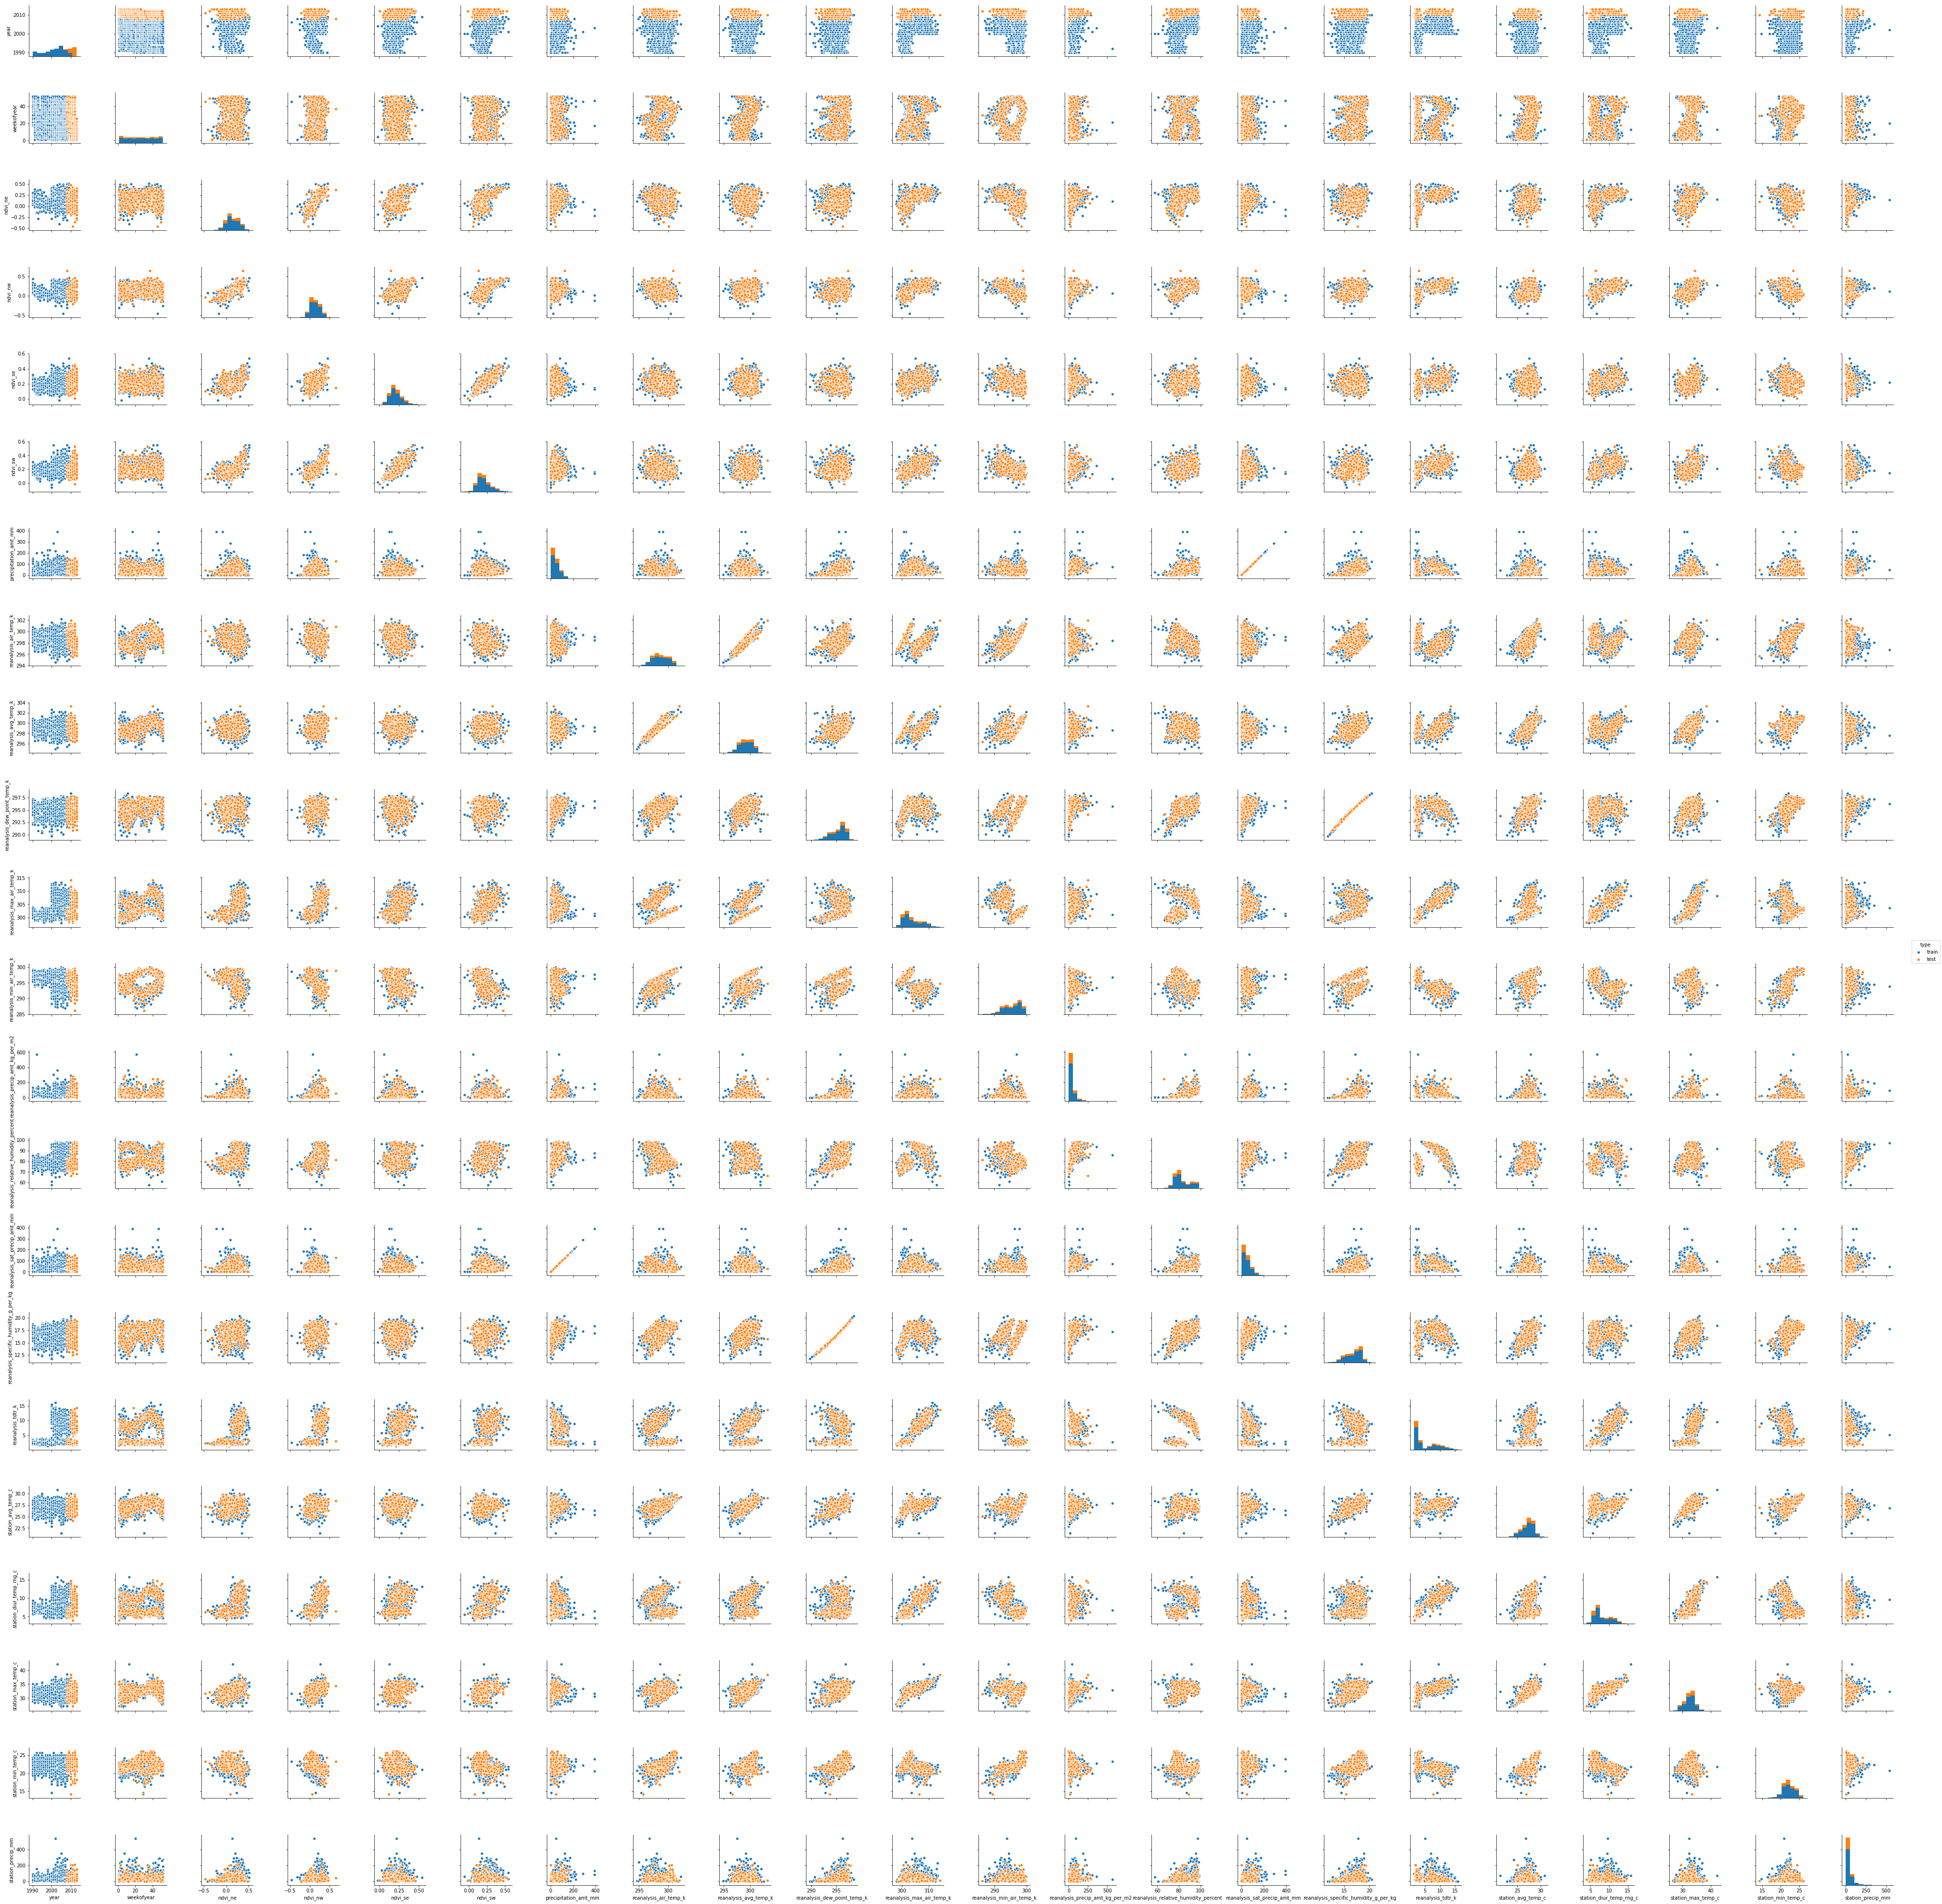

In [11]:
sns.pairplot(data=test_and_train.dropna(), hue='type')

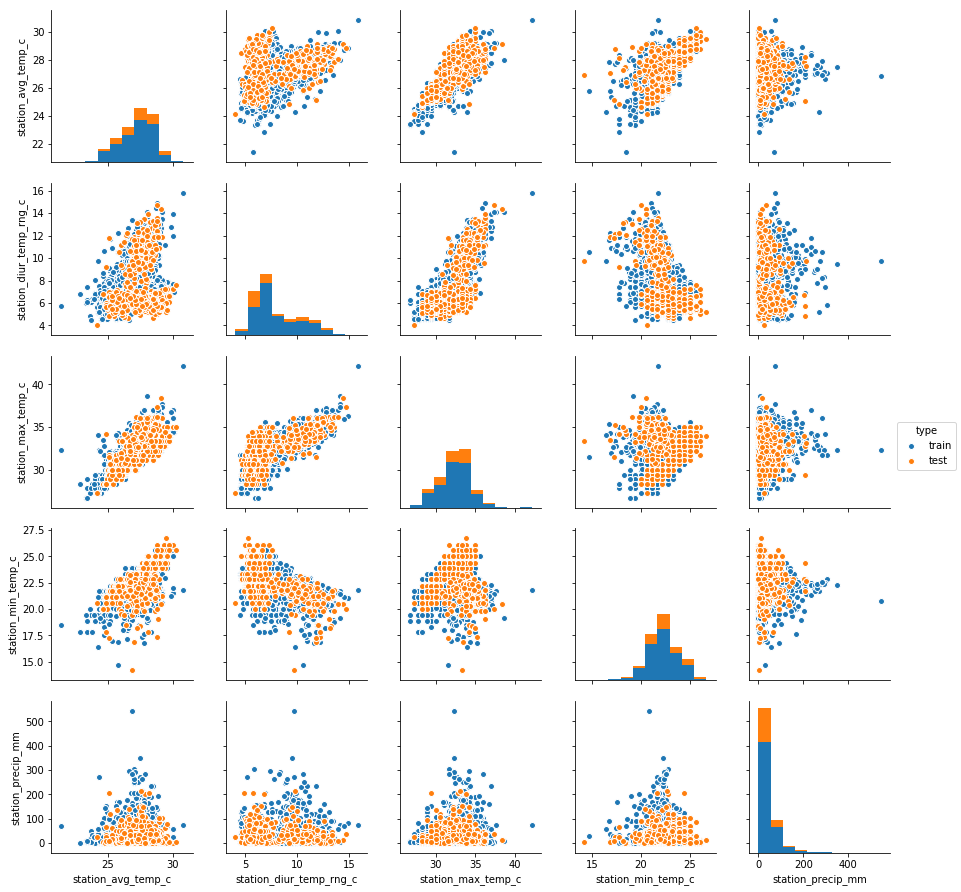

In [16]:
sns.pairplot(data=test_and_train[station_feature_names + ['type']].dropna(), hue='type')

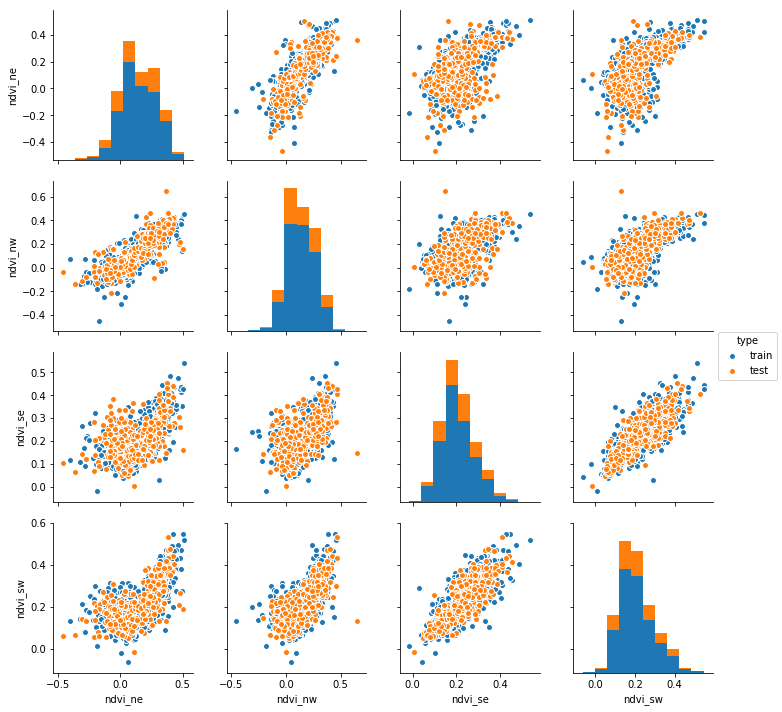

In [17]:
sns.pairplot(data=test_and_train[ndvi_feature_names + ['type']].dropna(), hue='type')

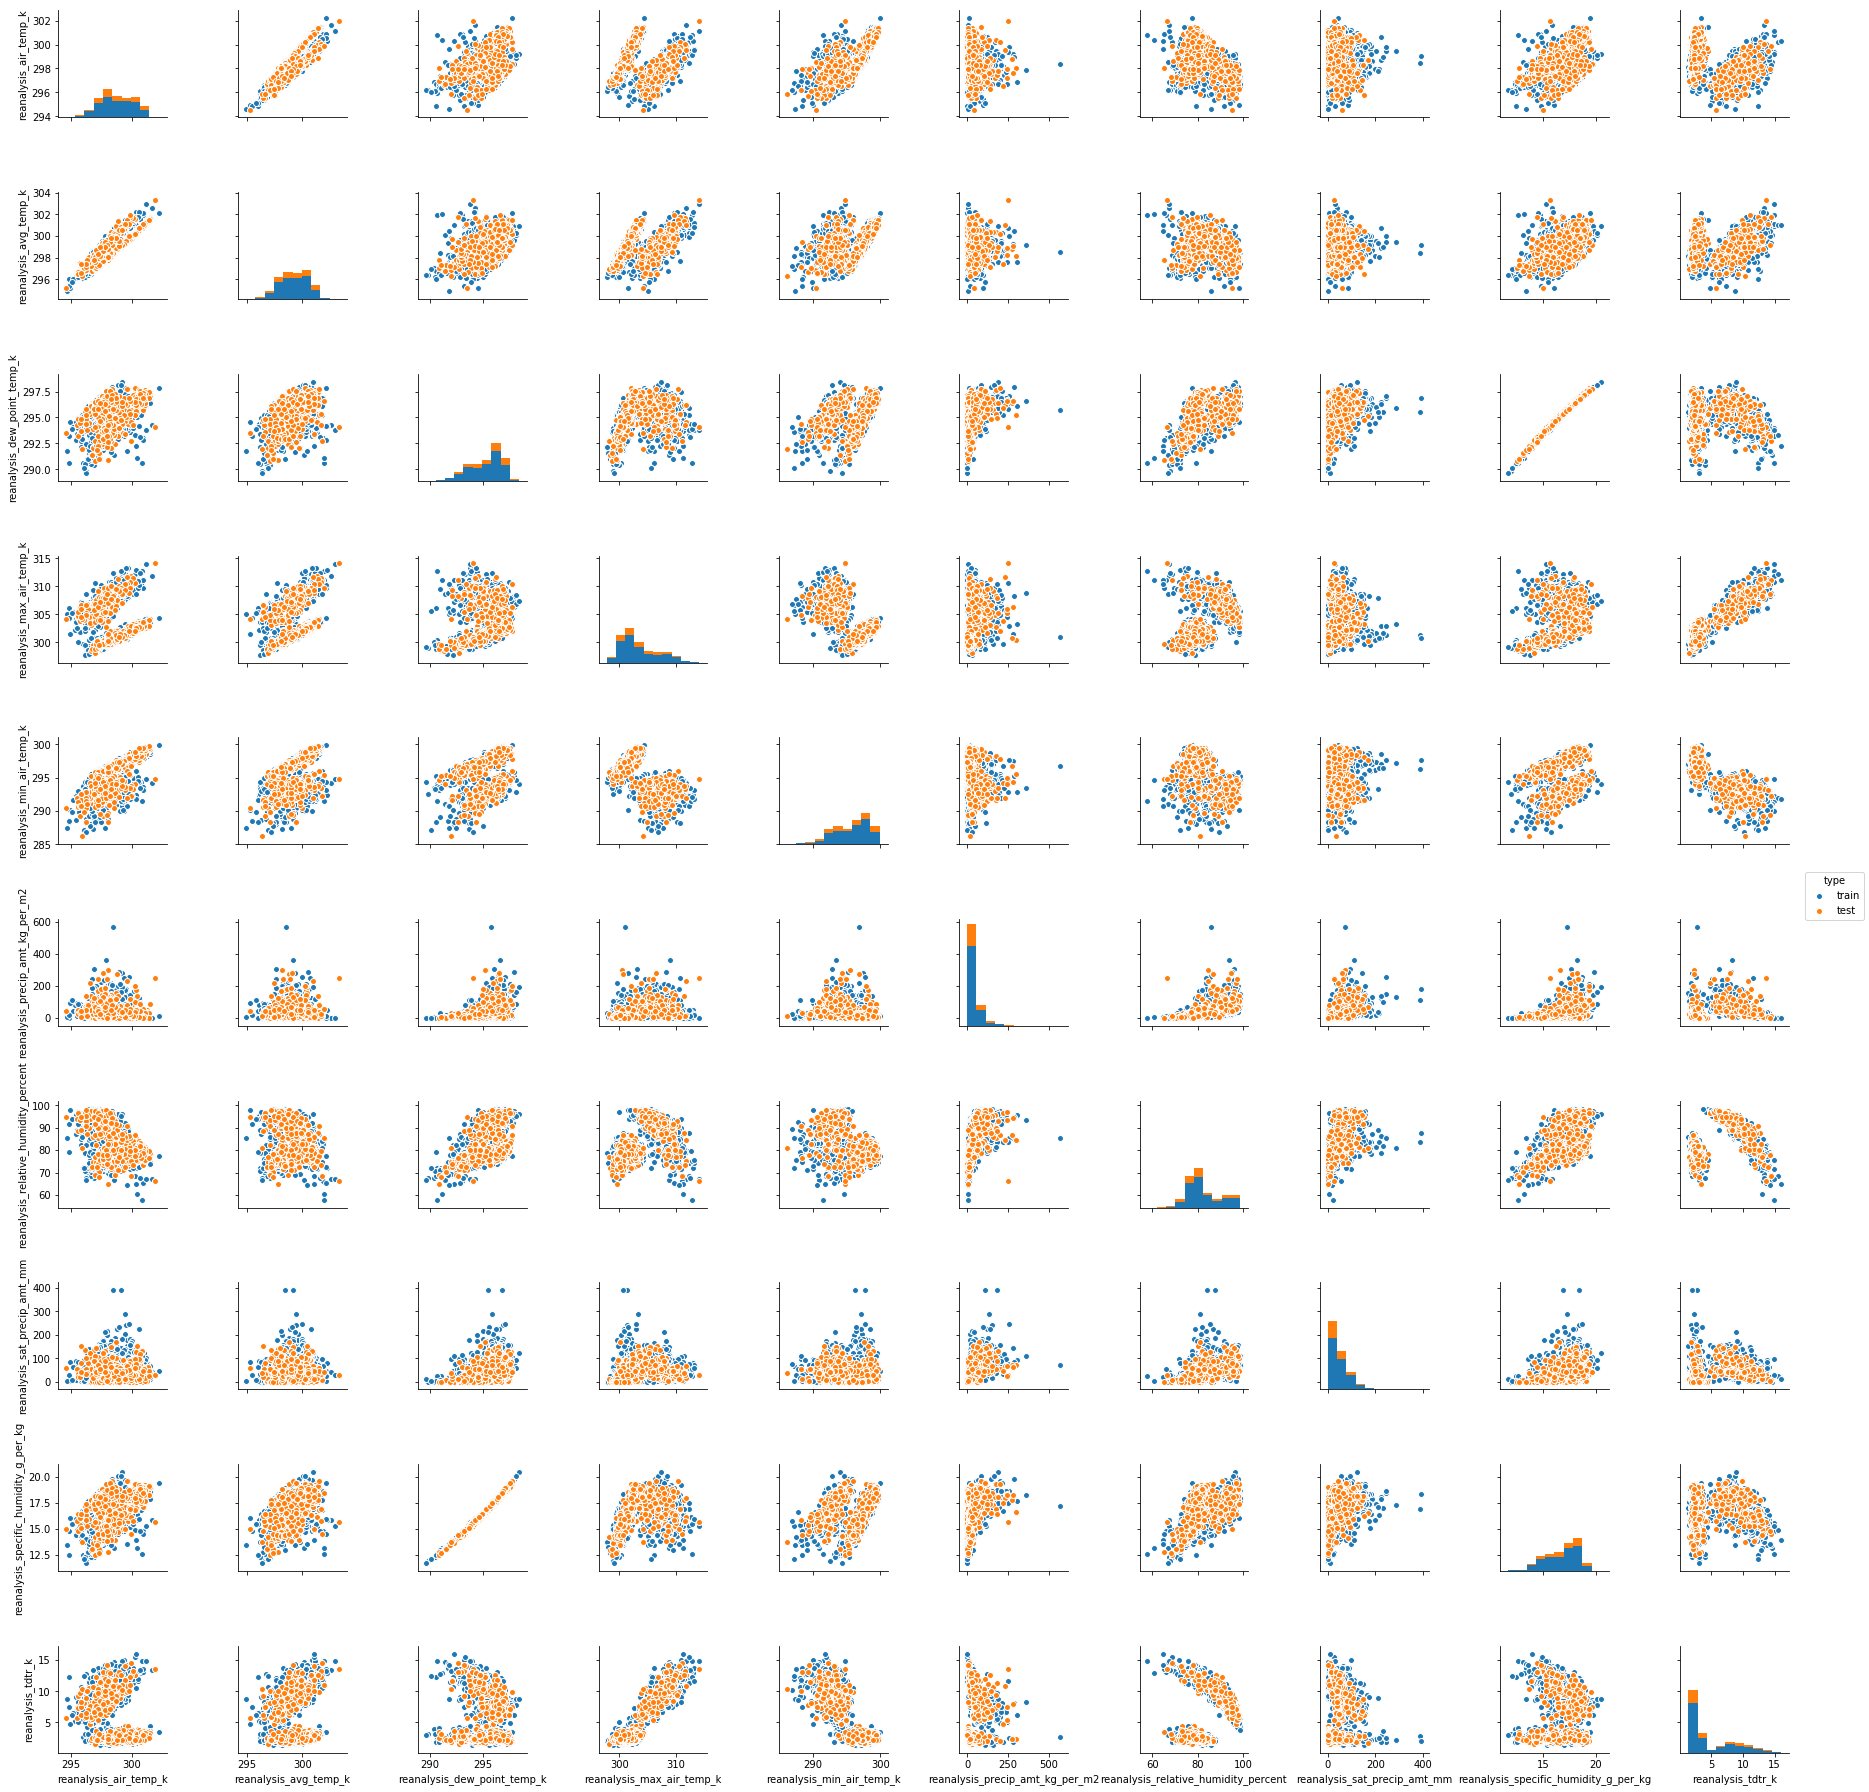

In [18]:
sns.pairplot(data=test_and_train[reanalysis_feature_names + ['type']].dropna(), hue='type')

In [33]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=test_and_train[ndvi_feature_names], hue='type')

ValueError: Cannot use `hue` without `x` or `y`

<Figure size 1440x1440 with 0 Axes>

In [ ]:
t